# Student Explanation Classification

This notebook builds a machine learning model to classify how correct a student's explanation is based on their response, the question text, and the multiple-choice answer.

### Dataset Overview
- **Input Features:** `StudentExplanation`, `QuestionText`, `MC_Answer`
- **Target:** `Category` (e.g., `True_Correct`, `True_Neither`, etc.)
- **Files:** `train.csv`, `test.csv`

### Tasks Covered
1. Data Loading
2. Preprocessing
3. Visualization
4. Model Training (4 Algorithms)
5. Evaluation
6. Hyperparameter Tuning
7. Model Saving


In [14]:
import pandas as pd

# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Display samples
train_df.head()


,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception
0,0,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),0ne third is equal to tree nineth,True_Correct,NaN
1,1,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 / 3 because 6 over 9 is 2 thirds and 1 third...,True_Correct,NaN
2,2,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),"1 3rd is half of 3 6th, so it is simplee to un...",True_Neither,NaN
3,3,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 goes into everything and 3 goes into nine,True_Neither,NaN
4,4,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 out of every 3 isn't coloured,True_Correct,NaN


In [15]:
import numpy as np
import string
import re
from sklearn.preprocessing import LabelEncoder

# Combine text columns
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)  # remove LaTeX
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

# Clean and combine input features
train_df['text'] = train_df['QuestionText'].apply(clean_text) + " " + \
                   train_df['MC_Answer'].apply(clean_text) + " " + \
                   train_df['StudentExplanation'].apply(clean_text)

test_df['text'] = test_df['QuestionText'].apply(clean_text) + " " + \
                  test_df['MC_Answer'].apply(clean_text) + " " + \
                  test_df['StudentExplanation'].apply(clean_text)

# Encode labels only if Category column exists
le = LabelEncoder()
train_df['label'] = le.fit_transform(train_df['Category'])

X_train = train_df['text']
y_train = train_df['label']
X_test = test_df['text']

# If test labels are available
if 'Category' in test_df.columns:
    test_df['label'] = le.transform(test_df['Category'])
    y_test = test_df['label']
else:
    y_test = None  # handle this case later

# Optional: View label mapping
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
label_map


{'False_Correct': 0,
 'False_Misconception': 1,
 'False_Neither': 2,
 'True_Correct': 3,
 'True_Misconception': 4,
 'True_Neither': 5}

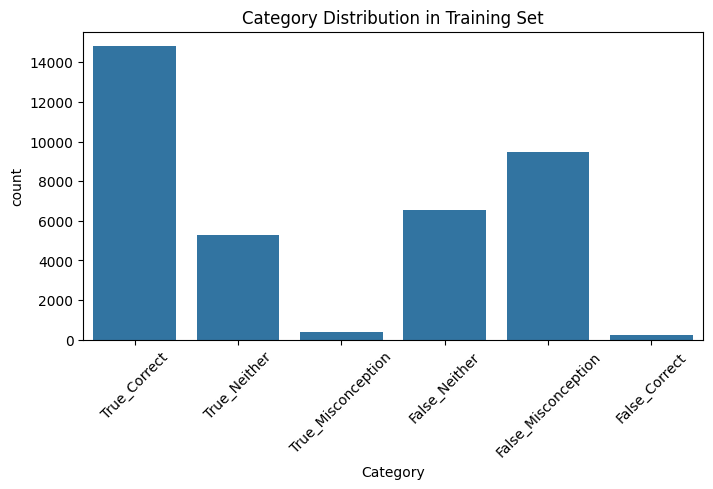

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot label distribution
plt.figure(figsize=(8,4))
sns.countplot(x=train_df['Category'])
plt.title("Category Distribution in Training Set")
plt.xticks(rotation=45)
plt.show()


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt


🔧 Training Naive Bayes...
Predictions for Naive Bayes completed.
📊 Accuracy for Naive Bayes: 0.6846
                     precision    recall  f1-score   support

      False_Correct       0.00      0.00      0.00        45
False_Misconception       0.67      0.77      0.72      1892
      False_Neither       0.62      0.48      0.54      1308
       True_Correct       0.73      0.86      0.79      2961
 True_Misconception       0.00      0.00      0.00        81
       True_Neither       0.58      0.38      0.46      1053

           accuracy                           0.68      7340
          macro avg       0.44      0.41      0.42      7340
       weighted avg       0.66      0.68      0.67      7340



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

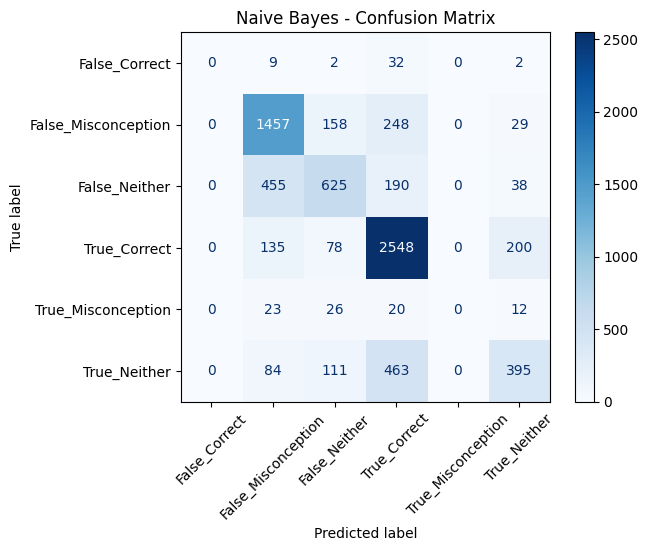


🔧 Training Logistic Regression...
Predictions for Logistic Regression completed.
📊 Accuracy for Logistic Regression: 0.8492
                     precision    recall  f1-score   support

      False_Correct       1.00      0.02      0.04        45
False_Misconception       0.83      0.91      0.87      1892
      False_Neither       0.85      0.75      0.80      1308
       True_Correct       0.86      0.96      0.91      2961
 True_Misconception       1.00      0.17      0.29        81
       True_Neither       0.83      0.62      0.71      1053

           accuracy                           0.85      7340
          macro avg       0.90      0.57      0.61      7340
       weighted avg       0.85      0.85      0.84      7340



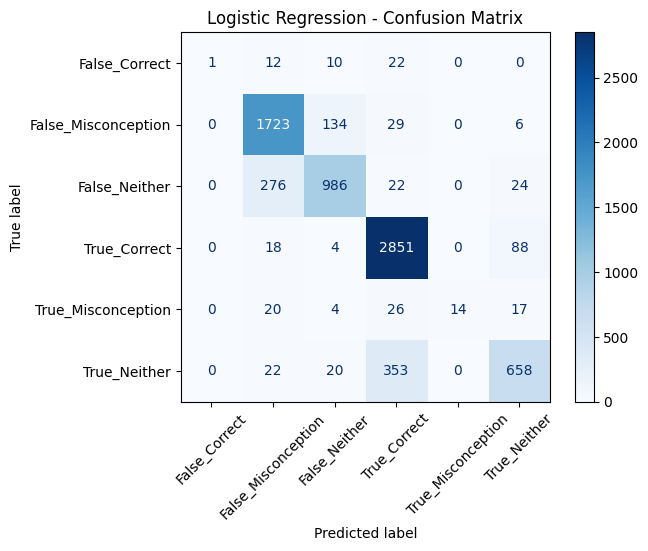


🔧 Training Random Forest...
Predictions for Random Forest completed.
📊 Accuracy for Random Forest: 0.9948
                     precision    recall  f1-score   support

      False_Correct       1.00      0.96      0.98        45
False_Misconception       0.99      1.00      0.99      1892
      False_Neither       0.99      0.99      0.99      1308
       True_Correct       1.00      1.00      1.00      2961
 True_Misconception       1.00      1.00      1.00        81
       True_Neither       1.00      0.99      0.99      1053

           accuracy                           0.99      7340
          macro avg       1.00      0.99      0.99      7340
       weighted avg       0.99      0.99      0.99      7340



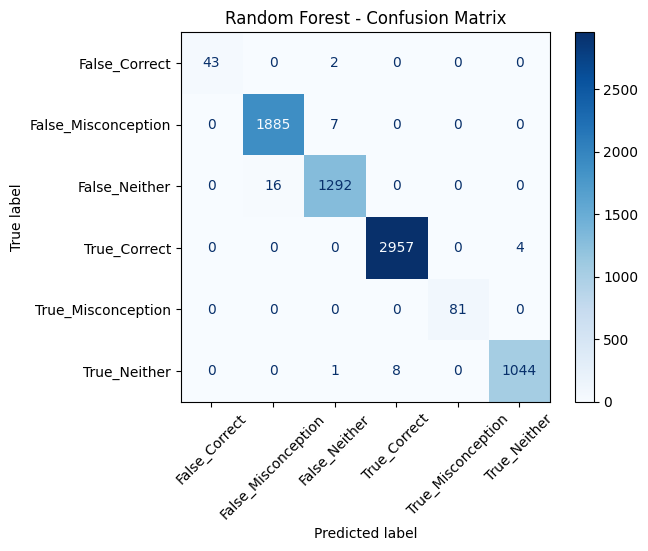


🔧 Training Gradient Boosting...
Predictions for Gradient Boosting completed.
📊 Accuracy for Gradient Boosting: 0.7729
                     precision    recall  f1-score   support

      False_Correct       0.94      0.69      0.79        45
False_Misconception       0.71      0.89      0.79      1892
      False_Neither       0.79      0.55      0.64      1308
       True_Correct       0.81      0.93      0.87      2961
 True_Misconception       0.94      0.72      0.81        81
       True_Neither       0.74      0.40      0.52      1053

           accuracy                           0.77      7340
          macro avg       0.82      0.70      0.74      7340
       weighted avg       0.77      0.77      0.76      7340



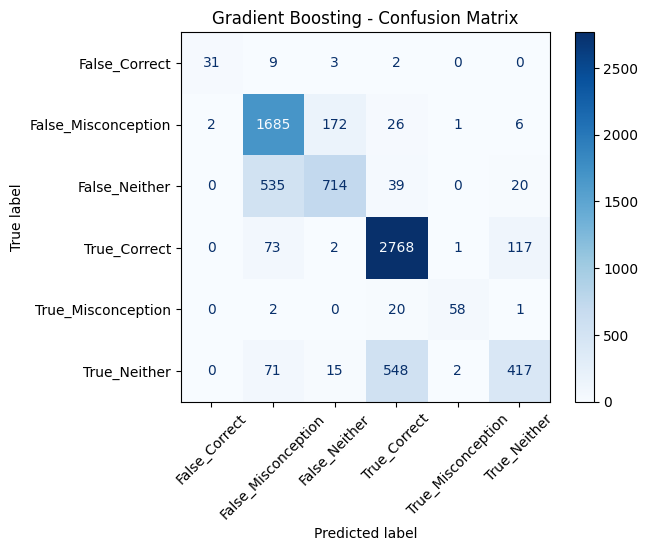

In [19]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Store model accuracies
accuracies = {}

for name, model in models.items():
    print(f"\n🔧 Training {name}...")
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)
    
    print(f"Predictions for {name} completed.")
    
    if y_test is not None:
        acc = accuracy_score(y_test, preds)
        print(f"📊 Accuracy for {name}: {acc:.4f}")
        print(classification_report(y_test, preds, target_names=le.classes_))
        
        # Confusion matrix
        ConfusionMatrixDisplay.from_predictions(
            y_test, preds, display_labels=le.classes_, cmap="Blues", xticks_rotation=45
        )
        plt.title(f"{name} - Confusion Matrix")
        plt.show()
        
        accuracies[name] = acc
    else:
        print("No true labels in test set. Skipping evaluation.")


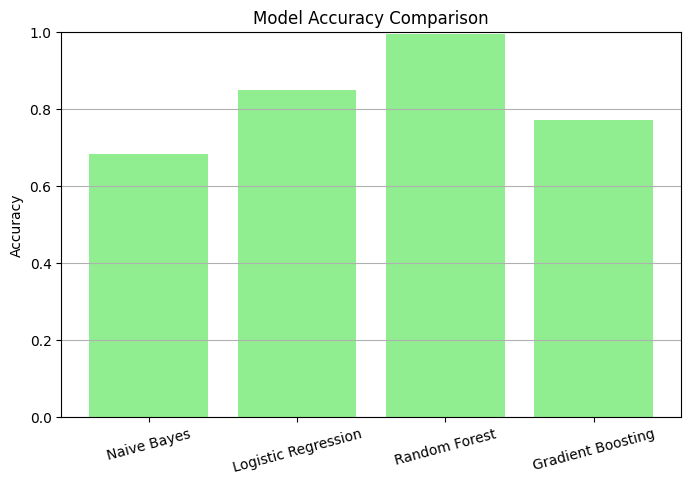

In [20]:
if accuracies:
    plt.figure(figsize=(8, 5))
    plt.bar(accuracies.keys(), accuracies.values(), color='lightgreen')
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy Comparison")
    plt.ylim(0, 1)
    plt.grid(axis="y")
    plt.xticks(rotation=15)
    plt.show()


In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "Logistic Regression": {
        "C": [0.1, 1, 10]
    },
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [10, None]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.1, 0.01]
    }
}

best_models = {}

for name, params in param_grid.items():
    print(f"\nTuning {name}...")
    clf = GridSearchCV(models[name], param_grid=params, cv=3, scoring='f1_weighted', n_jobs=-1)
    clf.fit(X_train_vec, y_train)
    print(f"Best parameters: {clf.best_params_}")
    best_models[name] = clf.best_estimator_



Tuning Logistic Regression...
Best parameters: {'C': 0.1}

Tuning Random Forest...
Best parameters: {'max_depth': 10, 'n_estimators': 100}

Tuning Gradient Boosting...
Best parameters: {'learning_rate': 0.01, 'n_estimators': 100}


In [ ]:
import joblib

# Save best performing model
best_model = best_models['Random Forest']
joblib.dump(best_model, "best_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

print("Model and vectorizer saved!")


Model and vectorizer saved!


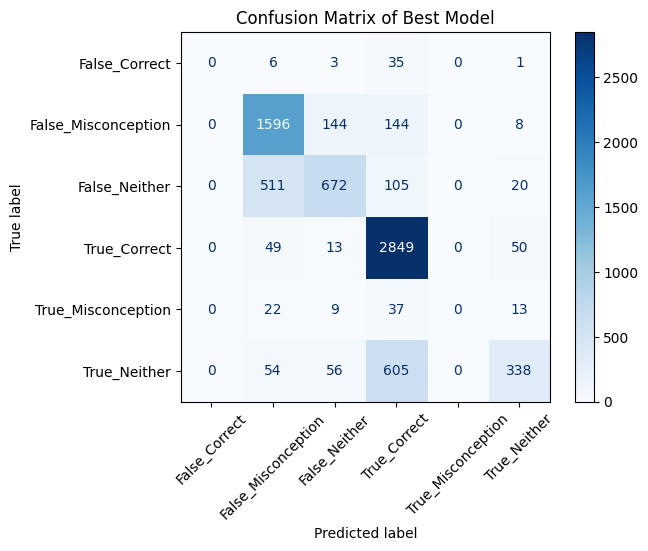

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_best = best_model.predict(X_test_vec)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, display_labels=le.classes_, cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix of Best Model")
plt.show()


In [27]:
import joblib
import json

# Load model and vectorizer
model = joblib.load("best_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")  # or "tfidf_vectorizer.pkl" if you saved it with that name

# Load label mapping
with open("label_mapping.json", "r") as f:
    label_mapping = json.load(f)

# Invert the mapping to get label index -> label name
inv_label_mapping = {int(v): k for v, k in label_mapping.items()}

# Example explanations
new_explanations = [
    "The sun revolves around the earth.",
    "Plants absorb food from the soil through roots.",
    "Objects fall faster if they are heavier.",
]

# Transform input
X_new = vectorizer.transform(new_explanations)

# Predict
preds = model.predict(X_new)

# Get readable labels
predicted_labels = [inv_label_mapping[p] for p in preds]

# Show predictions
for i, explanation in enumerate(new_explanations):
    print(f"Explanation: {explanation}")
    print(f"Predicted Misconception: {predicted_labels[i]}\n")


Explanation: The sun revolves around the earth.
Predicted Misconception: Base_rate

Explanation: Plants absorb food from the soil through roots.
Predicted Misconception: Adding_terms

Explanation: Objects fall faster if they are heavier.
Predicted Misconception: Adding_terms

